In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c cifar-10


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [1]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [2]:
from zipfile import ZipFile

dataset = '/content/test.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

BadZipFile: File is not a zip file

In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [4]:
filenames = os.listdir('/content/train')

In [5]:
type(filenames)

list

In [6]:
len(filenames)

50000

In [7]:
print(filenames[0:5])
print(filenames[-5:])

['35968.png', '42899.png', '43429.png', '33199.png', '5755.png']
['30256.png', '10096.png', '137.png', '6908.png', '18055.png']


In [8]:
labels_df = pd.read_csv('/content/trainLabels.csv')


In [9]:
labels_df.shape

(50000, 2)

In [10]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [11]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [12]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [13]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [14]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


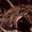

In [15]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/19871.png')
cv2_imshow(img)

In [16]:
labels_df[labels_df['id'] == 46988]

,id,label
46987,46988,airplane


In [17]:
id_list = list(labels_df['id'])

In [18]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [19]:
train_data_folder = '/content/train/'

data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [20]:
type(data[0])

numpy.ndarray

In [21]:
len(data)

50000

In [22]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
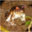

In [23]:
data[0]

In [24]:
X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [29]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [30]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.2684 - loss: 2.0525 - val_acc: 0.3368 - val_loss: 1.8473
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3349 - loss: 1.8567 - val_acc: 0.3458 - val_loss: 1.8232
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.3638 - loss: 1.7892 - val_acc: 0.3722 - val_loss: 1.7722
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - acc: 0.3726 - loss: 1.7574 - val_acc: 0.3783 - val_loss: 1.7379
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.3813 - loss: 1.7418 - val_acc: 0.3842 - val_loss: 1.7109
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3942 - loss: 1.7137 - val_acc: 0.3932 - val_loss: 1.6919
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3938 - loss: 1.7050 - val_acc: 0.3840 - val_loss: 1.7092
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.3979 - loss: 1.6925 - val_acc: 0.3938 - val_loss: 1.7147
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

In [ ]:

!pip install --user keras

In [ ]:
# from tensorflow import keras
# from keras import Dense, Dropout, Flatten, BatchNormalization, Sequential, models, layers
# from keras import Sequential, load_model

In [35]:
from keras import Sequential, models, layers, optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.models import Model
from keras.applications.resnet50 import ResNet50


In [ ]:
# from tensorflow.keras import Sequential, models, layers
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.models import load_model
# from tensorflow.keras.models import Model
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras import optimizers

In [36]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [37]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [38]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy', metrics=['acc'])

In [39]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 447s 352ms/step - acc: 0.5707 - loss: 1.3015 - val_acc: 0.8413 - val_loss: 0.4762
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 404s 343ms/step - acc: 0.8843 - loss: 0.3813 - val_acc: 0.9243 - val_loss: 0.2326
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 350ms/step - acc: 0.9447 - loss: 0.1982 - val_acc: 0.9308 - val_loss: 0.2170
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 350ms/step - acc: 0.9719 - loss: 0.1202 - val_acc: 0.9373 - val_loss: 0.2136
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 393s 350ms/step - acc: 0.9863 - loss: 0.0711 - val_acc: 0.9395 - val_loss: 0.1997
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 386s 343ms/step - acc: 0.9918 - loss: 0.0486 - val_acc: 0.9400 - val_loss: 0.2144
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 450s 350ms/step - acc: 0.9934 - loss: 0.0378 - val_acc: 0.9430 - val_loss: 0.2052
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 350ms/step - acc: 0.9953 - loss: 0.0298 - val_acc: 0.9435 - val_loss: 0.2011
Epoch 9/

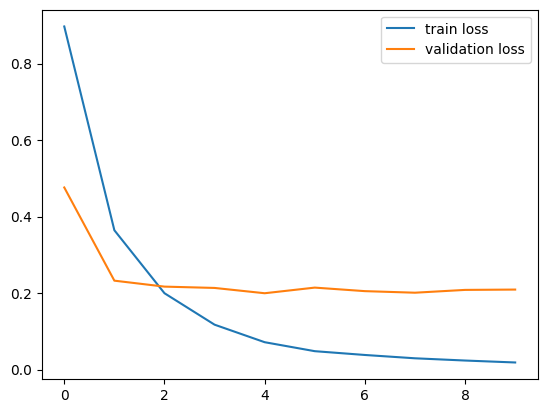

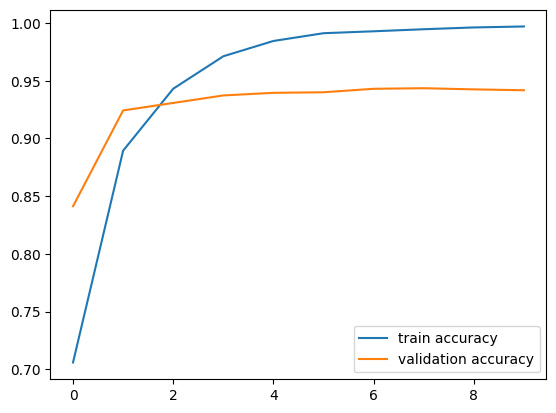

In [40]:
h = history

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()